Si le R² du modèle polynomial est supérieur à celui du modèle linéaire, cela montre que la régression polynomiale est plus adaptée pour capturer la non-linéarité des données.
Le RMSE plus faible indique que la régression polynomiale donne de meilleures prédictions que la régression linéaire.
Attention à ne pas choisir un degré trop élevé, sinon on risque le sur-ajustement.


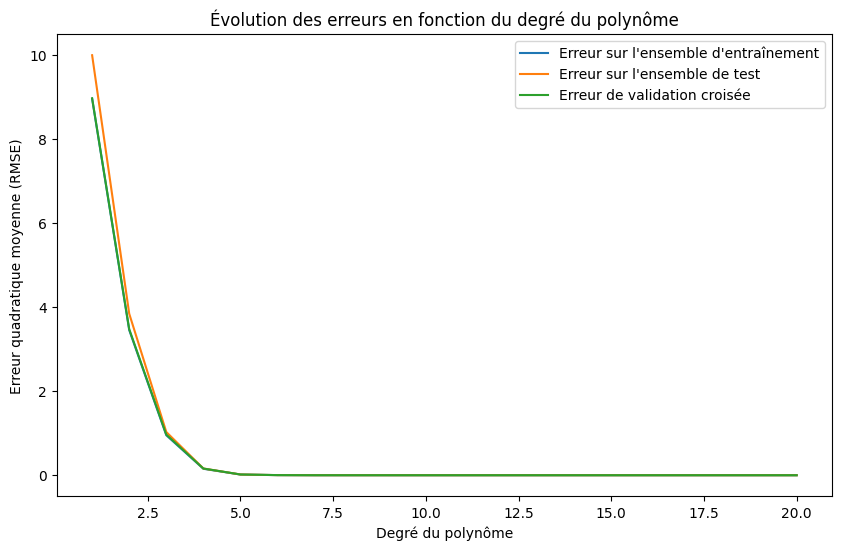

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Charger les données
df = pd.read_csv("/content/manufacturing.csv")  # Remplacez par le chemin réel de votre fichier

# Sélection des variables les plus corrélées avec 'Quality Rating'
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix["Quality Rating"].abs().sort_values(ascending=False)
selected_features = correlation_with_target.index[1:4]  # Sélection des 3 variables les plus corrélées

X = df[selected_features]
y = df["Quality Rating"]

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Séparation des données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialisation des listes pour stocker les scores
degrees = list(range(1, 21))
train_errors = []
test_errors = []
cross_val_scores = []

# Boucle sur les différents degrés de polynômes
for degree in degrees:
    # Création du pipeline avec transformation polynomiale et régression linéaire
    model = make_pipeline(PolynomialFeatures(degree, include_bias=False), LinearRegression())

    # Entraînement du modèle
    model.fit(X_train, y_train)

    # Prédictions sur l'ensemble d'entraînement
    y_train_pred = model.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_errors.append(train_rmse)

    # Prédictions sur l'ensemble de test
    y_test_pred = model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_errors.append(test_rmse)

    # Validation croisée
    cross_val_score_mean = -cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
    cross_val_scores.append(np.sqrt(cross_val_score_mean))

# Visualisation des erreurs en fonction du degré du polynôme
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Erreur sur l\'ensemble d\'entraînement')
plt.plot(degrees, test_errors, label='Erreur sur l\'ensemble de test')
plt.plot(degrees, cross_val_scores, label='Erreur de validation croisée')
plt.xlabel('Degré du polynôme')
plt.ylabel('Erreur quadratique moyenne (RMSE)')
plt.title('Évolution des erreurs en fonction du degré du polynôme')
plt.legend()
plt.show()


In [ ]:
correlation_matrix = df.corr()
correlation_matrix

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
Temperature (°C),1.000000,-0.024754,0.571743,0.974901,0.971210,-0.461279
Pressure (kPa),-0.024754,1.000000,0.773572,0.151095,-0.022862,0.013129
Temperature x Pressure,0.571743,0.773572,1.000000,0.694733,0.555579,-0.258474
Material Fusion Metric,0.974901,0.151095,0.694733,1.000000,0.976708,-0.511972
Material Transformation Metric,0.971210,-0.022862,0.555579,0.976708,1.000000,-0.575756
Quality Rating,-0.461279,0.013129,-0.258474,-0.511972,-0.575756,1.000000


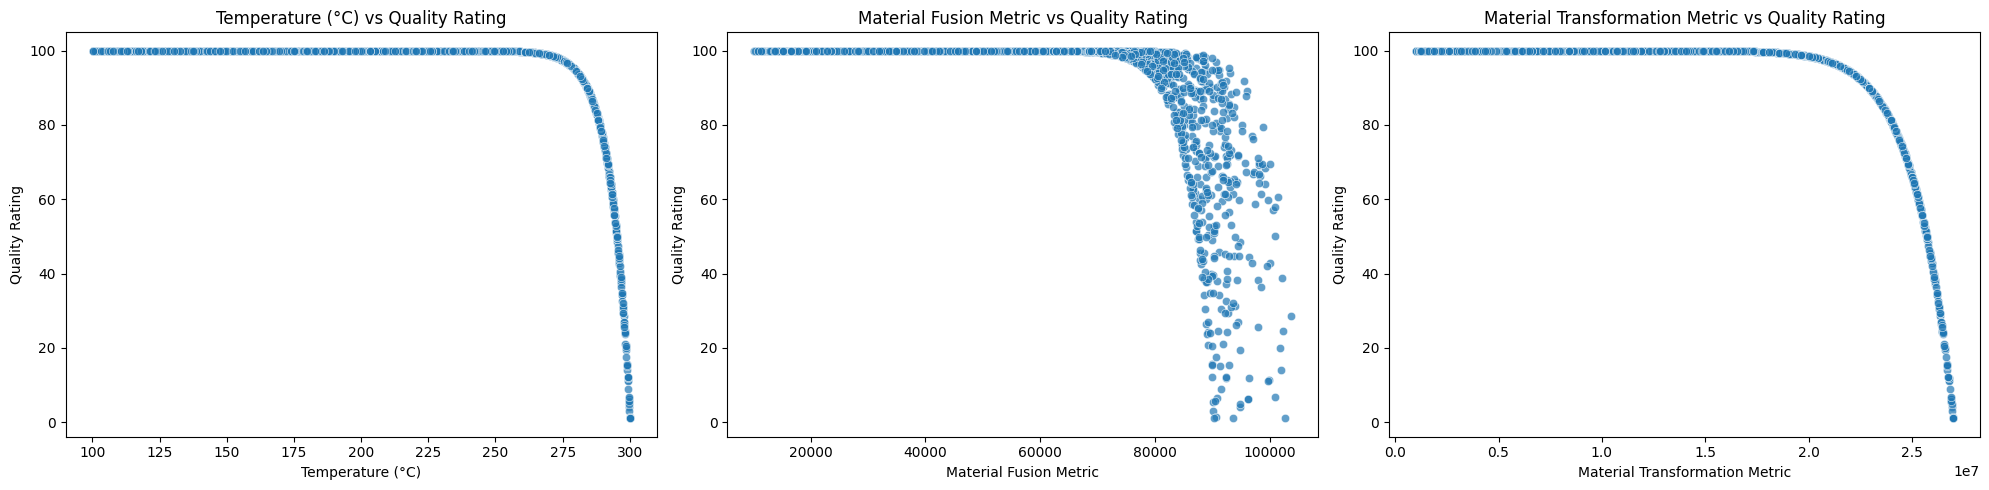

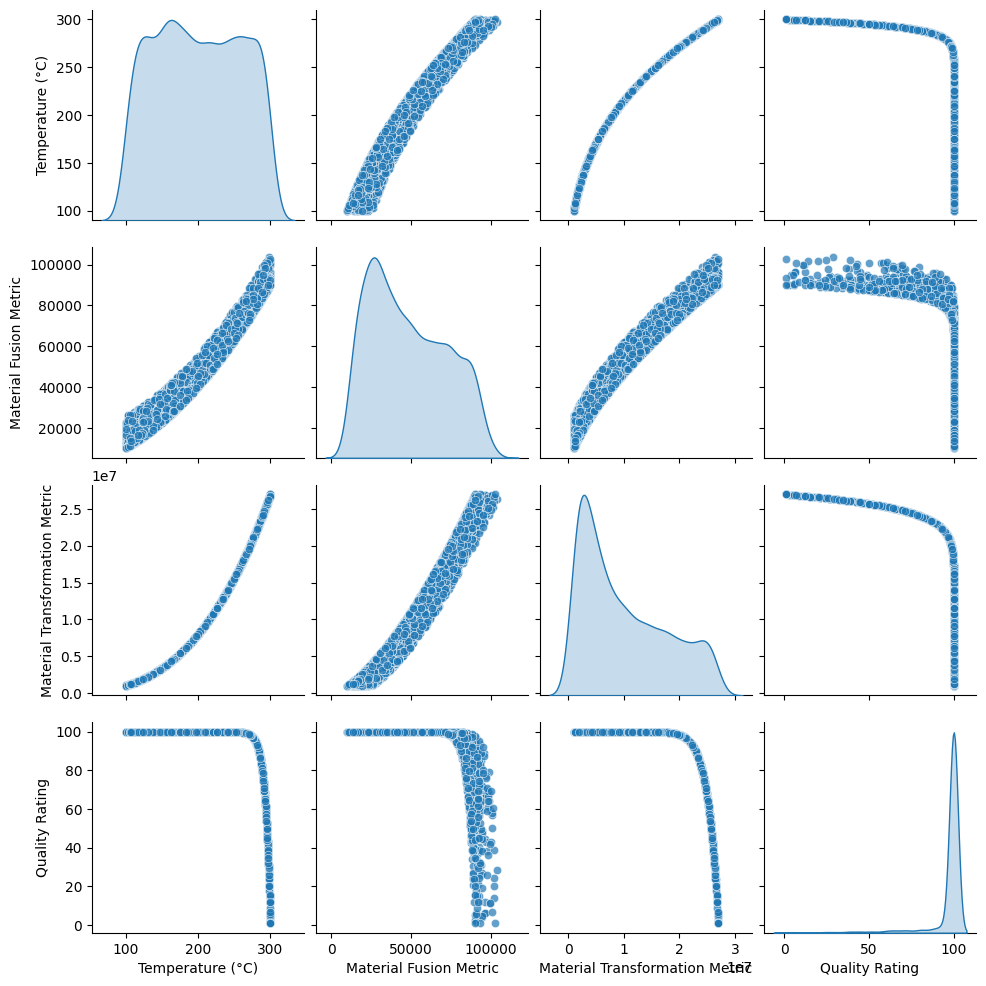

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assurez-vous que 'df' est défini et contient les colonnes nécessaires.
# Features et cible à analyser
features = ['Temperature (°C)', 'Material Fusion Metric', 'Material Transformation Metric']
target = 'Quality Rating'

# Vérification de l'existence des colonnes
if set(features + [target]).issubset(df.columns):
    # Scatter plots individuels
    plt.figure(figsize=(20, 5))

    for i, col in enumerate(features):
        plt.subplot(1, len(features), i + 1)  # Subplots côte à côte
        sns.scatterplot(x=df[col], y=df[target], marker='o', alpha=0.7)
        plt.title(f"{col} vs {target}")
        plt.xlabel(col)
        plt.ylabel(target)

    plt.tight_layout()
    plt.show()

    # Pairplot pour toutes les relations
    sns.pairplot(
        df[features + [target]],
        kind='scatter',
        diag_kind='kde',
        markers='o',
        plot_kws={'alpha': 0.7}
    )
    plt.show()
else:
    print("Erreur : Vérifiez que toutes les colonnes nécessaires existent dans le DataFrame.")


Affichage de Graphiques

plt.tight_layout()
plt.show()
Trois graphiques de dispersion sont affichés montrant la relation entre Quality Rating (axe Y) et :
Temperature (°C)
Material Fusion Metric
Material Transformation Metric
Tous montrent une chute rapide après un certain seuil, suggérant une non-linéarité.
Transformation en Polynômes

Importation de Seaborn (import seaborn as sns).
Transformation des données d'entrée X en utilisant PolynomialFeatures(degree=2) pour capturer des relations non linéaires.
📊 Interprétation des Graphiques
Il semble que Quality Rating diminue fortement après un certain point dans toutes les variables.
Cela peut indiquer un effet seuil où la qualité se détériore après une certaine température ou métrique.
La régression polynomiale est utilisée pour mieux modéliser cette relation non linéaire.



📈 Performance du modèle polynomiale:
RMSE: 6.194760497156036
R²: 0.8120257483039748

📊 Comparaison des performances :
R² Régression Linéaire: 0.5100879426174683
R² Régression Polynômiale: 0.8120257483039748


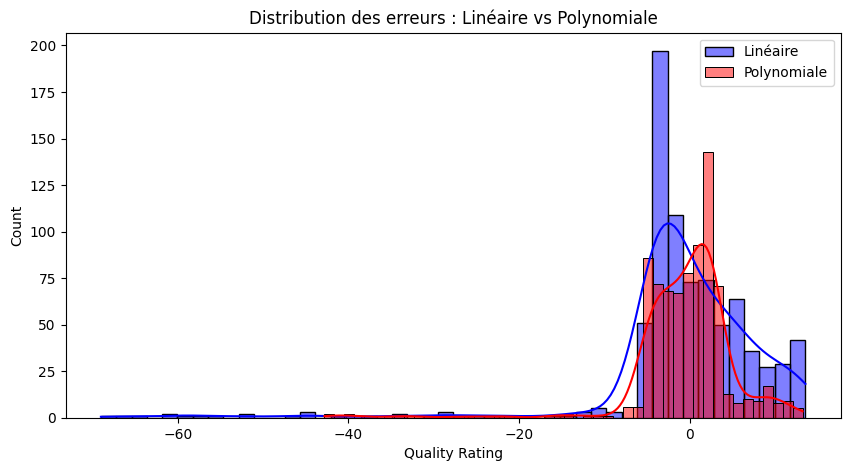

In [ ]:
import seaborn as sns
#  Transformation en polynômes de degré 2
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

#  Séparation des données en train/test
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

#  Entraînement du modèle
model = LinearRegression()
model.fit(X_train, y_train)

#  Prédictions
y_pred = model.predict(X_test)

#  Évaluation du modèle
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\n📈 Performance du modèle polynomiale:")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

#  Comparaison avec une régression linéaire simple (sans polynômes)
model_lin = LinearRegression()
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(X, y, test_size=0.2, random_state=42)
model_lin.fit(X_train_lin, y_train_lin)
y_pred_lin = model_lin.predict(X_test_lin)
r2_lin = r2_score(y_test_lin, y_pred_lin)

print(f"\n📊 Comparaison des performances :")
print(f"R² Régression Linéaire: {r2_lin}")
print(f"R² Régression Polynômiale: {r2}")

#  Visualisation des erreurs
residuals_poly = y_test - y_pred
residuals_lin = y_test_lin - y_pred_lin

plt.figure(figsize=(10, 5))
sns.histplot(residuals_lin, color="blue", label="Linéaire", kde=True)
sns.histplot(residuals_poly, color="red", label="Polynomiale", kde=True)
plt.legend()
plt.title("Distribution des erreurs : Linéaire vs Polynomiale")
plt.show()

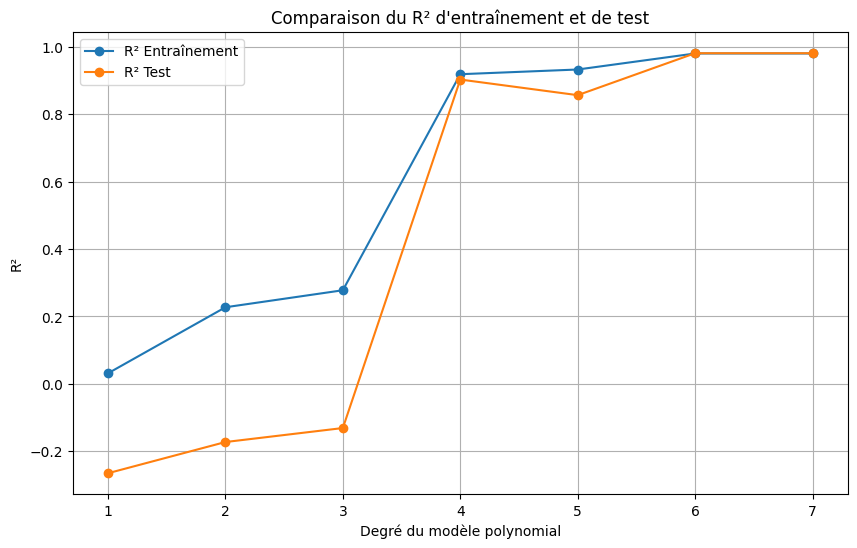

([0.0314856179084565,
  0.22725336910751648,
  0.27769141361309924,
  0.9181608392705604,
  0.9321104431432167,
  0.9796242331137188,
  0.979628868196938],
 [-0.26476731037457313,
  -0.17229452662297118,
  -0.13079844317588596,
  0.9023548438819369,
  0.8560491750865582,
  0.9803934817485674,
  0.9803862232248183])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Génération de données fictives
np.random.seed(42)
X = np.sort(np.random.rand(100, 1) * 10, axis=0)  # 100 échantillons entre 0 et 10
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])  # Données avec bruit autour de sin(x)

# Séparer les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fonction pour ajuster des modèles polynomiaux de différents degrés
def polynomial_regression(X_train, y_train, X_test, y_test, degrees):
    train_r2 = []
    test_r2 = []

    for degree in degrees:
        # Transformation polynomiale
        poly = PolynomialFeatures(degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)

        # Entraîner le modèle
        model = LinearRegression()
        model.fit(X_train_poly, y_train)

        # Prédictions et calcul de R²
        y_train_pred = model.predict(X_train_poly)
        y_test_pred = model.predict(X_test_poly)

        train_r2.append(r2_score(y_train, y_train_pred))
        test_r2.append(r2_score(y_test, y_test_pred))

    return train_r2, test_r2

# Degrés pour les modèles polynomiaux
degrees = [1, 2, 3, 4, 5, 6, 7]

# Calcul des R² pour différents degrés
train_r2, test_r2 = polynomial_regression(X_train, y_train, X_test, y_test, degrees)

# Affichage des résultats
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_r2, label='R² Entraînement', marker='o')
plt.plot(degrees, test_r2, label='R² Test', marker='o')
plt.xlabel('Degré du modèle polynomial')
plt.ylabel('R²')
plt.title('Comparaison du R² d\'entraînement et de test')
plt.legend()
plt.grid(True)
plt.show()

train_r2, test_r2


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

# Génération de données non linéaires (par exemple, y = sin(x) + bruit)
X = np.sort(np.random.rand(200, 1) * 10, axis=0)  # 200 échantillons entre 0 et 10
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])  # Sinusoidal avec bruit

# Séparer les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle Linéaire
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_train_pred_linear = linear_model.predict(X_train)
y_test_pred_linear = linear_model.predict(X_test)

# Modèle Polynomial (degré 3)
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_train_pred_poly = poly_model.predict(X_train_poly)
y_test_pred_poly = poly_model.predict(X_test_poly)

# Calcul des métriques
mae_linear_train = mean_absolute_error(y_train, y_train_pred_linear)
mae_poly_train = mean_absolute_error(y_train, y_train_pred_poly)
mae_linear_test = mean_absolute_error(y_test, y_test_pred_linear)
mae_poly_test = mean_absolute_error(y_test, y_test_pred_poly)

mse_linear_train = mean_squared_error(y_train, y_train_pred_linear)
mse_poly_train = mean_squared_error(y_train, y_train_pred_poly)
mse_linear_test = mean_squared_error(y_test, y_test_pred_linear)
mse_poly_test = mean_squared_error(y_test, y_test_pred_poly)

# Résultats
(mae_linear_train, mae_poly_train, mae_linear_test, mae_poly_test,
 mse_linear_train, mse_poly_train, mse_linear_test, mse_poly_test)


(0.5560256435761003,
 0.5246368195594671,
 0.5364485384970624,
 0.42411001918239677,
 0.43596440886409554,
 0.3561829808421605,
 0.4172328590995097,
 0.25019653568442773)

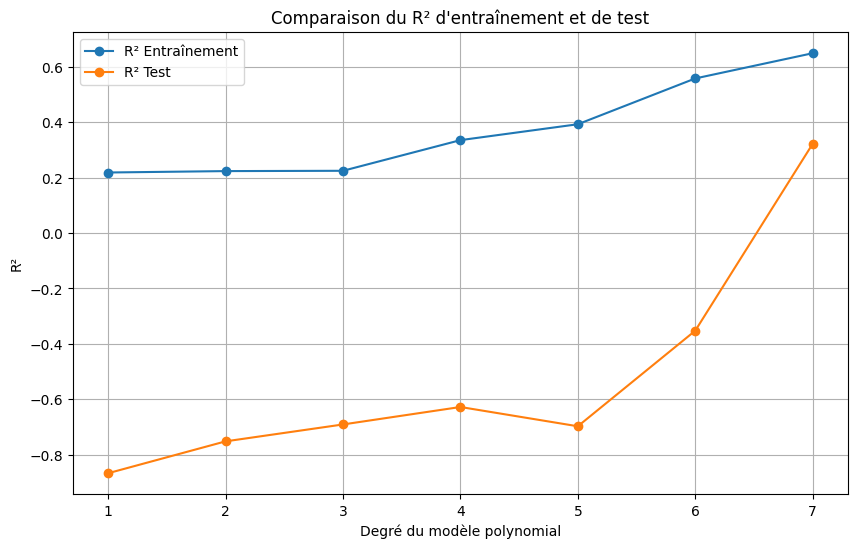

R² d'entraînement pour différents degrés : [0.21866060262902187, 0.22372536639785967, 0.22482141000558353, 0.33546883619896306, 0.39286646642305545, 0.5581718351805885, 0.6492349836830074]
R² de test pour différents degrés : [-0.8668673350663003, -0.7518262651926795, -0.6908409575899528, -0.6278122076990726, -0.6973956699416621, -0.3523756122715287, 0.3221718082419952]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Données générées précédemment : heures de travail et productivité
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
              21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
              39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]).reshape(-1, 1)
y = np.array([1.5, 3.2, 5.1, 6.8, 8.2, 9.1, 9.3, 8.8, 7.5, 6.0, 4.3, 2.8, 1.5, 0.5,
              0.1, 0.2, 0.9, 1.8, 3.0, 4.2, 5.3, 6.0, 6.5, 6.3, 5.4, 4.0, 2.5, 1.1,
              0.2, 0.1, 0.3, 1.0, 1.7, 2.3, 2.9, 3.3, 3.7, 3.9, 4.0, 4.0, 3.8, 3.5,
              3.1, 2.7, 2.3, 1.9, 1.5, 1.1, 0.7, 0.4])

# Séparer les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fonction pour ajuster des modèles polynomiaux de différents degrés
def polynomial_regression(X_train, y_train, X_test, y_test, degrees):
    train_r2 = []
    test_r2 = []

    for degree in degrees:
        # Transformation polynomiale
        poly = PolynomialFeatures(degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)

        # Entraîner le modèle
        model = LinearRegression()
        model.fit(X_train_poly, y_train)

        # Prédictions et calcul de R²
        y_train_pred = model.predict(X_train_poly)
        y_test_pred = model.predict(X_test_poly)

        train_r2.append(r2_score(y_train, y_train_pred))
        test_r2.append(r2_score(y_test, y_test_pred))

    return train_r2, test_r2

# Degrés pour les modèles polynomiaux
degrees = [1, 2, 3, 4, 5, 6, 7]

# Calcul des R² pour différents degrés
train_r2, test_r2 = polynomial_regression(X_train, y_train, X_test, y_test, degrees)

# Affichage des résultats
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_r2, label='R² Entraînement', marker='o')
plt.plot(degrees, test_r2, label='R² Test', marker='o')
plt.xlabel('Degré du modèle polynomial')
plt.ylabel('R²')
plt.title('Comparaison du R² d\'entraînement et de test')
plt.legend()
plt.grid(True)
plt.show()

print("R² d'entraînement pour différents degrés :", train_r2)
print("R² de test pour différents degrés :", test_r2)


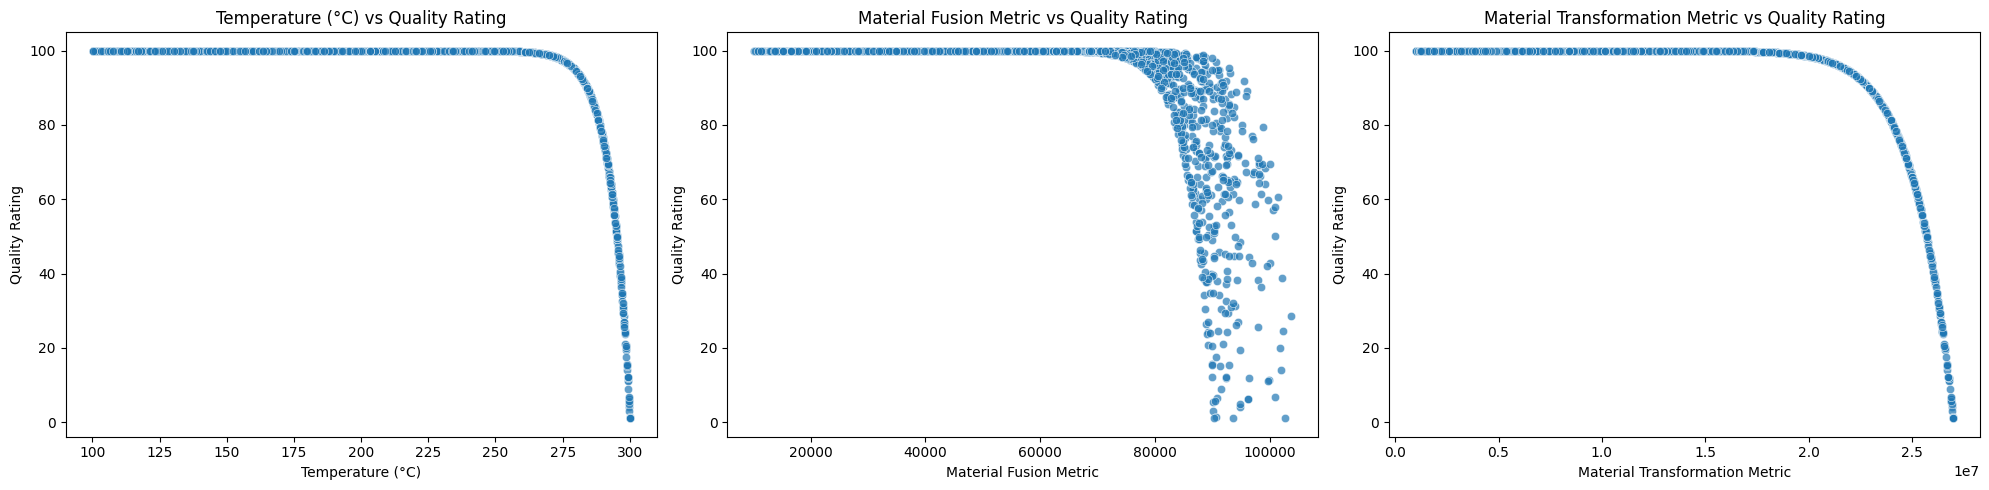

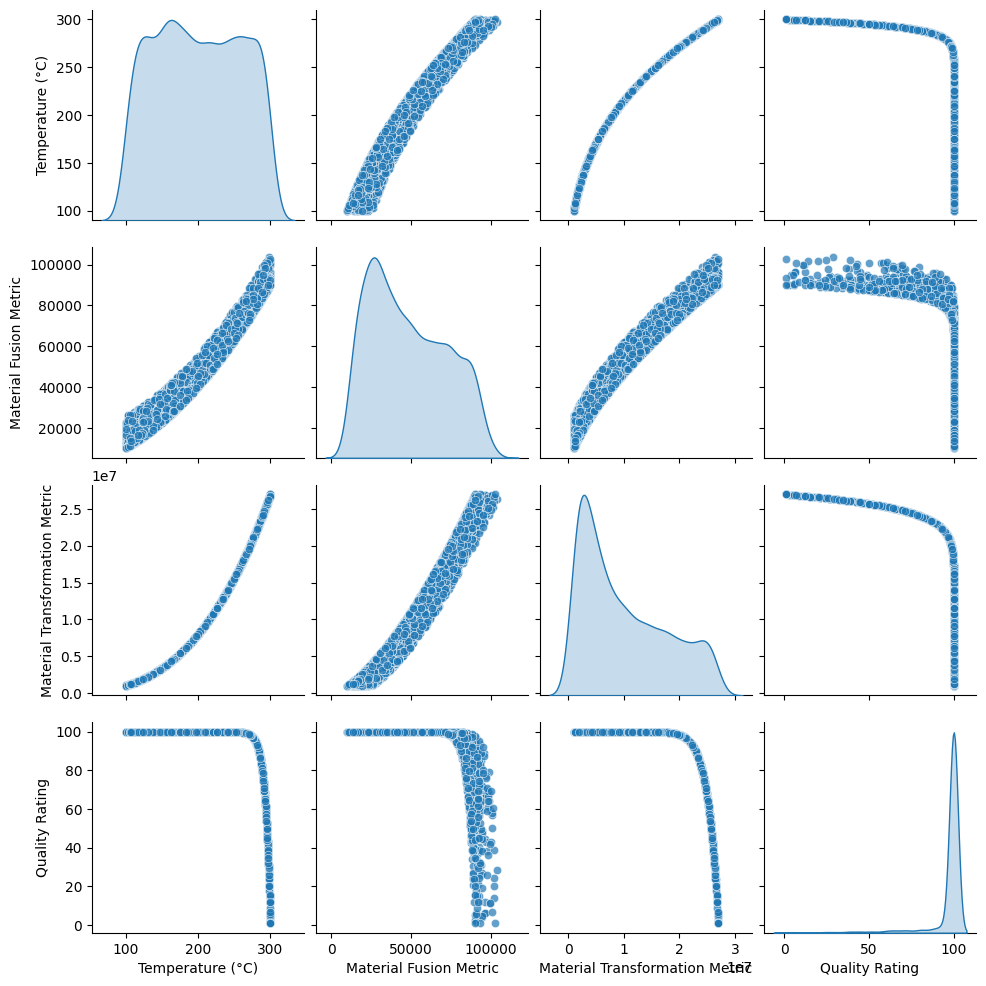

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assurez-vous que 'df' est défini et contient les colonnes nécessaires.
# Features et cible à analyser
features = ['Temperature (°C)', 'Material Fusion Metric', 'Material Transformation Metric']
target = 'Quality Rating'

# Vérification de l'existence des colonnes
if set(features + [target]).issubset(df.columns):
    # Scatter plots individuels
    plt.figure(figsize=(20, 5))

    for i, col in enumerate(features):
        plt.subplot(1, len(features), i + 1)  # Subplots côte à côte
        sns.scatterplot(x=df[col], y=df[target], marker='o', alpha=0.7)
        plt.title(f"{col} vs {target}")
        plt.xlabel(col)
        plt.ylabel(target)

    plt.tight_layout()
    plt.show()

    # Pairplot pour toutes les relations
    sns.pairplot(
        df[features + [target]],
        kind='scatter',
        diag_kind='kde',
        markers='o',
        plot_kws={'alpha': 0.7}
    )
    plt.show()
else:
    print("Erreur : Vérifiez que toutes les colonnes nécessaires existent dans le DataFrame.")
